# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Analysis of a Damped Spring Pendulum

The damped [spring pendulum](https://en.wikipedia.org/wiki/Spring_pendulum) is an example for a physical system that can be modeled by a linear ordinary differential equation (ODE) with constant coefficients. In view of the theory of signals and systems it hence can be interpreted as a linear time-invariant (LTI) system. The mechanical properties of the damped spring pendulum are analyzed by using the theory of LTI systems. The underlying mechanical setup is depicted in the following

![Damped spring pendulum](damped_spring.png)

A rigid body of mass $m$ is mounted on a spring with stiffness $k$ which is connected to the ground. A damper with viscous damping coefficient $c$ is mounted parallel to the spring to model the friction present in the system. It is assumed that the movement of the mass over time is restricted to the vertical axis, here denoted by $y$. It is assumed further that the mass is in its idle position for $t<0$. The pretension of the spring by the mass can be neglected this way. It is additionally assumed that the mass is not moving for $t<0$. Denoting the displacement of the mass over time with $y(t)$, these initial conditions are formulated as $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ for $t<0$.

The normalized values $m = 0.1$, $c = 0.1$, $k = 2.5$ are used for illustration in the following.

### Differential Equation

The differential equation of the mechanical system is derived by considering the force equilibrium at the mass

\begin{equation}
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
\end{equation}

where $F_\text{E}(t)$ denotes an external force acting onto the mass, the other forces are derived in the sequel. The force $F_\text{S}(t)$ induced by the spring is given by [Hooke's law](https://en.wikipedia.org/wiki/Hooke%27s_law)

\begin{equation}
F_\text{S}(t) = k y(t)
\end{equation}

Its common to model the frictional force $F_\text{F}(t)$ as being proportional to the velocity of the mass

\begin{equation}
F_\text{F}(t) = c \frac{d y(t)}{dt}
\end{equation}

The inertial force $F_\text{I}(t)$ due to the acceleration of the mass is given as

\begin{equation}
F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}
\end{equation}

Introducing the forces into the force equilibrium yields the differential equation describing the displacement of the damped spring pendulum

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t)
\end{equation}

as a consequence of the external force.
Above equation constitutes an ODE with constant coefficients. It can be interpreted as an LTI system with the external force as input signal $x(t) = F_\text{E}(t)$ and the displacement of the mass as output signal $y(t)$.

### Comparison to Passive Electrical Networks

Comparing the ODEs of the damped spring pendulum and the [second-order analog low-pass](http://localhost:8888/notebooks/systems_time_domain/network_analysis.ipynb#Differential-Equation) yields that both constitute second-order ODEs with constant coefficients. Dividing the ODE of the second-order analog low pass by $C$ results in

\begin{equation}
L \frac{d^2 u_\text{o}(t)}{dt^2} + R \frac{d u_\text{o}(t)}{dt} + \frac{1}{C} u_\text{o}(t) = \frac{1}{C} u_\text{i}(t)
\end{equation}

where $u_\text{i}(t)$ and $u_\text{o}(t)$ denote the in- and output voltage of the analog circuit.
Comparison with above ODE of the spring pendulum yields the [equivalence of both systems](https://en.wikipedia.org/wiki/System_equivalence) for

| | 2nd-order low-pass | spring pendulum |
|:---|:---|:---|
| input signal $x(t)$ | $u_\text{i}(t) = F_\text{E}(t) C$ | $F_\text{E}(t) = \frac{u_\text{i}(t)}{C}$ |
| output signal $y(t)$ | $u_\text{o}(t)$ | $y(t)$ |
| | $L = m$ | $m = L$ |
| | $R = c$ | $c = R$ |
| | $C = \frac{1}{k} $ | $k = \frac{1}{C}$ |

Note, the equivalence between mechanical systems described by ODEs with constant coefficients and analog circuits was used to simulate such systems by [analog computers](https://en.wikipedia.org/wiki/Analog_computer).

### Impulse Response

The LTI system corresponding to the pendulum can be characterized by its [impulse response](impulse_response.ipynb) $h(t)$. It is defined as the output of the system for a Dirac impulse $x(t) = \delta(t)$ at the input. Physically this can be approximated by hitting the mass. The impulse response characterizes the movement $y(t)$ of the mass after such an event.

First the ODE of the spring pendulum is defined in `SymPy`

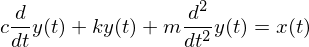

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

The normalized values of the physical constants are stored in a dictionary for ease of later substitution

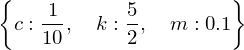

In [2]:
mck = {m: 0.1, c: sym.Rational('.1'), k: sym.Rational('2.5')}
mck

The impulse response is calculated by explicit solution of the ODE.

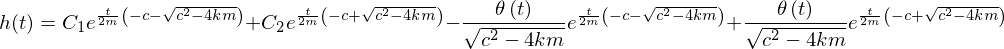

In [3]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

The integration constants $C_1$ and $C_2$ have to be determined from the initial conditions $y(t) = 0$ and $\frac{d y(t)}{dt} = 0$ for $t<0$. 

In [4]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

Substitution of the values for the integration constants $C_1$ and $C_2$ into the result from above yields the impulse response of the spring pendulum

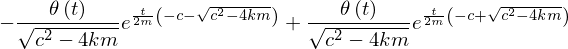

In [5]:
h = solution_h.subs(integration_constants).rhs
h

The impulse response is plotted for the specific values of $m$, $c$ and $k$ given above

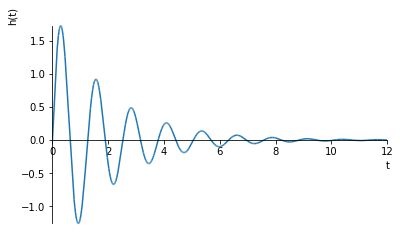

In [6]:
sym.plot(h.subs(mck), (t,0,12), ylabel=r'h(t)');

### Transfer Function

For an exponential input signal $x(t) = e^{s t}$, the [transfer function](eigenfunctions.ipynb#Transfer-Function) $H(s)$ represents the weight of the exponential output signal $y(t) = H(s) \cdot e^{s t}$. The transfer function is derived by introducing $x(t)$ and $y(t)$ into the ODE and solving for $H(s)$

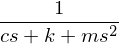

In [7]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

The transfer characteristics of an LTI system for harmonic exponential signals $e^{j \omega} = \cos(\omega t) + j \sin(\omega t)$ are of special interest in the analysis of resonating systems. It can be derived from $H(s)$ by substituting the complex frequency $s$ with $s = j \omega$. The resulting transfer function $H(j \omega)$ provides the attenuation and phase the system adds to a harmonic input signal.

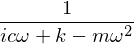

In [8]:
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

The magnitude of the transfer function $|H(j \omega)|$ is plotted for the specific values of the elements given above

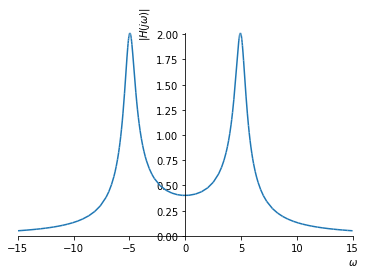

In [9]:
sym.plot(abs(Hjw.subs(mck)), (w, -15, 15), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

When inspecting the magnitude of the transfer function it becomes evident that the damped spring pendulum shows resonances (maxima) for two specific angular frequencies. These resonance frequencies $\omega_0$ are calculated by inspecting the extreme values of $|H(j \omega)|$. First the derivative of $|H(j \omega)|$ with respect to $\omega$ is computed and set to zero

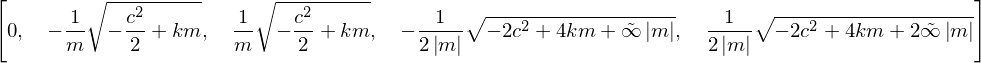

In [10]:
extrema = sym.solve(sym.Eq(sym.diff(abs(Hjw), w),0),w)
extrema

For the maxima of the transfer function only the 2nd and 3rd extrema are of interest

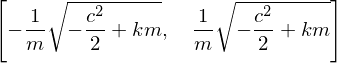

In [11]:
w0 = extrema[1:3]
w0

The resonance frequencies are computed for the specific values of $m$, $c$ and $k$ given above

In [12]:
[w00.subs(mck) for w00 in w0]

The phase of the transfer function $\varphi(j \omega)$ is computed and plotted for the specific values of the elements given above

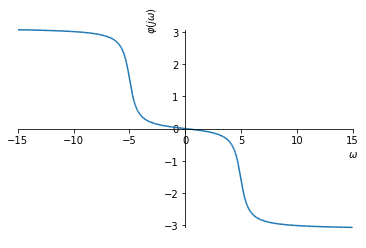

In [13]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(mck), (w, -15, 15), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

**Exercise**

* Change the viscous damping coefficient $c$ of the spring pendulum and investigate how the magnitude and phase of the transfer function $H(j \omega)$ changes.

* How does the frequency of the damped harmonic oscillation in the impulse response relate to the resonance frequency?

### Application: Vibration Isolation

An application of above example is the design of [vibration isolation](https://en.wikipedia.org/wiki/Vibration_isolation) by a damped spring pendulum. An typical example is a rotating machinery with mass $m$ which has some sort of imbalance. Assuming that the imbalance can be modeled as a rotating mass, the external force $F_\text{E}(t)$ is given by the vertical component of its [centrifugal force](https://en.wikipedia.org/wiki/Centrifugal_force)

\begin{equation}
F_\text{E}(t) = F_0 \sin(\omega t) = F_0 \cdot \Im \{e^{j \omega t} \}
\end{equation}

where $\omega$ denotes the angular frequency of the rotating machinery and 

\begin{equation}
F_0 = m_\text{I} r \omega^2 
\end{equation}

the amplitude of the force with $m_\text{I}$ denoting the mass of the imbalance and $r$ the radius of its circular orbit. Since $e^{j \omega t}$ is an eigenfunction of the LTI system, the resulting displacement is then given as

\begin{equation}
y(t) = F_0 \cdot \Im \{e^{j \omega t} H(j \omega) \}
\end{equation}

The aim of vibration isolation is to keep the magnitude of the displacement as low as possible.

**Exercise**

* Compute and plot the displacement for given $m_\text{I}$ and $r$.

* For which angular frequencies $\omega$ is the magnitude of the displacement largest? How is the phase relation between the external force $F_\text{E}(t)$ and displacement $y(t)$ at these frequencies?

* How should the resonance frequencies $\omega_0$ of the spring pendulum be chosen in order to get a good vibration isolation for a machine rotating with angular frequency $\omega$? How is the phase relation between the external force $F_\text{E}(t)$ and displacement $y(t)$ at this frequency?


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.